Đề bài <p>
Bạn là Data Analyst của công ty X. File dữ liệu Home_Values.xlsx chứa các giá trị median của các biến sau: giá nhà (Y), thu nhập hộ gia đình (Household income - HH Inc), thu nhập trên đầu người(Income per capita - Per Cap Inc) và tỷ lệ phần trăm số nhà có chủ sở hữu (percent of homes that are owner occupied - Pct Owner Occ ) cho mỗi bang trong nước Mỹ (bao gồm cả District of Columbia). Trước khi đi vào những phần tích chuyên sâu hơn, công ty của bạn muốn hiểu rõ 4 biến số này (ví dụ: central tendency, variability, hình dạng của phần phối dữ liệu - shape of the distribution, các pattern về mối quan hệ giữa các biến số). Để giúp công ty hiểu rõ hơn về dữ liệu, bạn được yêu cầu thực hiện các bước phân tích sau: <p>
1.	Tính toán mean, median, range và standard deviation của mỗi biến. Tổng hợp và trình bày kết quả vào 1 bảng.<p>
2.	Tạo 1 frequency histogram cho mỗi biến để xác định hình dạng của phần phối dữ liệu. Lưu ý mỗi chart cần có tiêu đề và các trục của biểu đồ cần được ghi chú rõ ràng.<p>
3.	Tạo biểu đồ boxplots cho mỗi biến. Lưu ý mỗi chart cần có tiêu đề và các trục của biểu đồ cần được ghi chú rõ ràng.<p>
4.	Tạo biểu đồ điểm (scatterplots) cho mỗi biến trong tương quan với 1 biến khác (gợi ý: bạn sẽ cần phải vẽ 6 scatterplots). Lưu ý mỗi chart cần có tiêu đề và các trục của biểu đồ cần được ghi chú rõ ràng.<p>
5.	Tính toán correlation coefficient của mỗi biến với các biến còn lại. Trình bày thành 1 bảng.<p>


In [37]:
# Import thư viện
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
sns.set_style('whitegrid')

# Chuẩn bị dữ liệu

In [38]:
# import dữ liệu vào 
df = pd.read_excel(r'D:\DATA ANALYST COURSES\MINX COURSES\Course 2 BI\Final exam\2.Descriptive statistics and visualization\data.xlsx')

In [39]:
df.head()

,Home_Values,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,State,Home Value,HH Inc,Per Cap Inc,Pct Owner Occ
1,Alabama,117600,42081,22984,71.1
2,Alaska,229100,66521,30726,64.7
3,Arizona,215000,50448,25680,67.4
4,Arkansas,102300,39267,21274,67.7


# Tìm hiểu và xử lý dữ liệu

In [40]:
# Thông tin dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Home_Values  52 non-null     object
 1   Unnamed: 1   52 non-null     object
 2   Unnamed: 2   52 non-null     object
 3   Unnamed: 3   52 non-null     object
 4   Unnamed: 4   52 non-null     object
dtypes: object(5)
memory usage: 2.2+ KB


==> Tập dữ liệu rất sạch, tuy nhiên tên cột và kiểu dữ liệu các cột trong bảng chưa hợp lý

In [41]:
# Đổi tên cột và xóa hàng đầu tiên
df.columns = df.iloc[0,:]
df_rev00 =  df.iloc[1:,:]

In [42]:
df_rev00.head()

,State,Home Value,HH Inc,Per Cap Inc,Pct Owner Occ
1,Alabama,117600,42081,22984,71.1
2,Alaska,229100,66521,30726,64.7
3,Arizona,215000,50448,25680,67.4
4,Arkansas,102300,39267,21274,67.7
5,California,458500,60883,29188,57.4


In [43]:
# Kiểm tra sự trùng lặp dữ liệu
df_rev00['State'].duplicated().sum()

0

In [44]:
df_rev00.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 1 to 51
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   State          51 non-null     object
 1   Home Value     51 non-null     object
 2   HH Inc         51 non-null     object
 3   Per Cap Inc    51 non-null     object
 4   Pct Owner Occ  51 non-null     object
dtypes: object(5)
memory usage: 2.1+ KB


In [45]:
# Set kiểu dữ liệu cho các cột
df_rev00['Home Value'] = pd.to_numeric(df_rev00['Home Value'])
df_rev00['HH Inc'] = pd.to_numeric(df_rev00['HH Inc'])
df_rev00['Per Cap Inc'] = pd.to_numeric(df_rev00['Per Cap Inc'])
df_rev00['Pct Owner Occ'] = pd.to_numeric(df_rev00['Pct Owner Occ'])

C:\Users\VINH\AppData\Local\Temp\ipykernel_11652\1378128066.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rev00['Home Value'] = pd.to_numeric(df_rev00['Home Value'])
C:\Users\VINH\AppData\Local\Temp\ipykernel_11652\1378128066.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rev00['HH Inc'] = pd.to_numeric(df_rev00['HH Inc'])
C:\Users\VINH\AppData\Local\Temp\ipykernel_11652\1378128066.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

In [46]:
df_rev00.dtypes

0
State             object
Home Value         int64
HH Inc             int64
Per Cap Inc        int64
Pct Owner Occ    float64
dtype: object

Ý nghĩa của các cột dữ liệu:
+ HH Inc: Giá nhà
+ HH Inc: Thu nhập hộ gia đình
+ Per Cap Inc: Thu nhập trên đầu người
+ Pct Owner Occ: Tỉ lệ phần trăm nhà có chủ sở hữu <p>
Các dữ liệu trên được thống kê treo các bang, ta có tổng cộng là 52 bang

# Phân tích dữ liệu

### 1.	Tính toán mean, median, range và standard deviation của mỗi biến. Tổng hợp và trình bày kết quả vào 1 bảng.

In [47]:
statictis_table = round(df_rev00.describe().T,2)
statictis_table

,count,mean,std,min,25%,50%,75%,max
0,,,,,,,,
Home Value,51.0,204107.84,98746.57,94500.0,126950.00,173300.0,252900.0,537400.0
HH Inc,51.0,51776.39,8357.42,37881.0,46315.50,49424.0,56849.5,70647.0
Per Cap Inc,51.0,26983.20,4329.31,19977.0,23947.00,25803.0,29097.5,42078.0
Pct Owner Occ,51.0,67.87,5.38,43.5,67.05,69.2,70.9,74.6


In [48]:
median_values = df_rev00.median()
median_values

C:\Users\VINH\AppData\Local\Temp\ipykernel_11652\3071287018.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median_values = df_rev00.median()


0
Home Value       173300.0
HH Inc            49424.0
Per Cap Inc       25803.0
Pct Owner Occ        69.2
dtype: float64

In [49]:
statictis_table['median'] = median_values
statictis_table

,count,mean,std,min,25%,50%,75%,max,median
0,,,,,,,,,
Home Value,51.0,204107.84,98746.57,94500.0,126950.00,173300.0,252900.0,537400.0,173300.0
HH Inc,51.0,51776.39,8357.42,37881.0,46315.50,49424.0,56849.5,70647.0,49424.0
Per Cap Inc,51.0,26983.20,4329.31,19977.0,23947.00,25803.0,29097.5,42078.0,25803.0
Pct Owner Occ,51.0,67.87,5.38,43.5,67.05,69.2,70.9,74.6,69.2


In [50]:
statictis_table.drop(columns=['count','25%','50%','75%'],inplace=True)
statictis_table

,mean,std,min,max,median
0,,,,,
Home Value,204107.84,98746.57,94500.0,537400.0,173300.0
HH Inc,51776.39,8357.42,37881.0,70647.0,49424.0
Per Cap Inc,26983.20,4329.31,19977.0,42078.0,25803.0
Pct Owner Occ,67.87,5.38,43.5,74.6,69.2


### 2.	Tạo 1 frequency histogram cho mỗi biến để xác định hình dạng của phần phối dữ liệu. Lưu ý mỗi chart cần có tiêu đề và các trục của biểu đồ cần được ghi chú rõ ràng.

In [51]:
# # Tạo hàm làm tròn lên và làm tròn xuống để tiện cho việc set các mốc giá trị
# def lamtronlen(x):
#     a = len(str(x)) 
#     b = '1'
#     for i in range(0,a):
#         b = b + '0'
#     c = math.ceil(float(b))
#     return c


In [52]:
# def lamtronxuong(x):
#     a = len(str(x)) 
#     b = '1'
#     for i in range(0,a):
#         b = b + '0'
#     c = math.floor(float(b))
#     return c

2.1. HH Inc: Giá nhà 

In [53]:
statictis_table

,mean,std,min,max,median
0,,,,,
Home Value,204107.84,98746.57,94500.0,537400.0,173300.0
HH Inc,51776.39,8357.42,37881.0,70647.0,49424.0
Per Cap Inc,26983.20,4329.31,19977.0,42078.0,25803.0
Pct Owner Occ,67.87,5.38,43.5,74.6,69.2


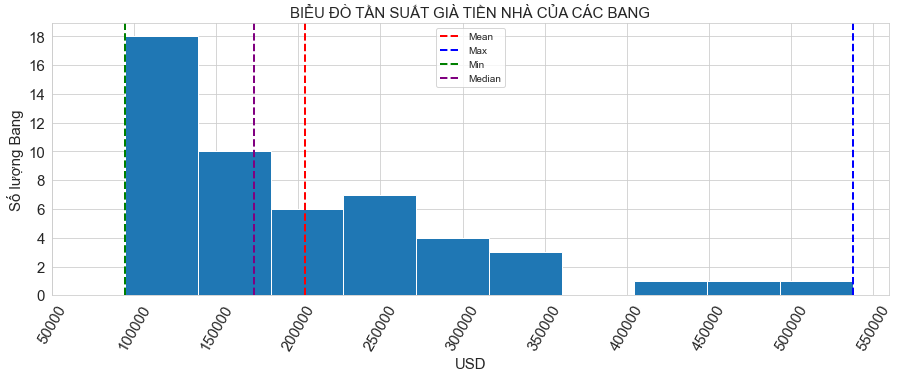

mean      204107.84
std        98746.57
min        94500.00
max       537400.00
median    173300.00
Name: Home Value, dtype: float64

In [54]:
plt.figure(figsize=(15,5))

plt.hist(df_rev00['Home Value'],bins=10)
plt.axvline(df_rev00['Home Value'].mean(),color='red',linestyle='--',label='Mean',linewidth=2)
plt.axvline(df_rev00['Home Value'].max(),color='blue',linestyle='--',label='Max',linewidth=2)
plt.axvline(df_rev00['Home Value'].min(),color='green',linestyle='--',label='Min',linewidth=2)
# plt.axvline(df_rev00['Home Value'].std(),color='yellow',linestyle='--',label='Standard Deviation',linewidth=2)
plt.axvline(df_rev00['Home Value'].median(),color='Purple',linestyle='--',label='Median',linewidth=2)
plt.xticks(np.arange(50000,600000,50000),fontsize=15,rotation=60)
plt.yticks(np.arange(0,20,2),fontsize=15)
plt.xlabel('USD',fontsize=15)
plt.ylabel('Số lượng Bang',fontsize=15)
plt.title('BIỂU ĐỒ TẦN SUẤT GIÀ TIỀN NHÀ CỦA CÁC BANG',fontsize=15)
plt.legend(prop={'size': 10})
plt.show();
statictis_table.iloc[0]

Nhận xét: Giá nhà phân hóa làm 3 nhóm (theo tần suất):
+ Nhóm 1: 100000$ đến 150000$
+ Nhóm 2: 150000$ đến 350000$
+ Nhóm 3: > 400000$  (khá cao, tách biệt với phần còn lại) <p>
==> Phần lớn giá nhà trung bình của các Bang cũng tương đối thấp, thấp hơn mức giá trung bình.

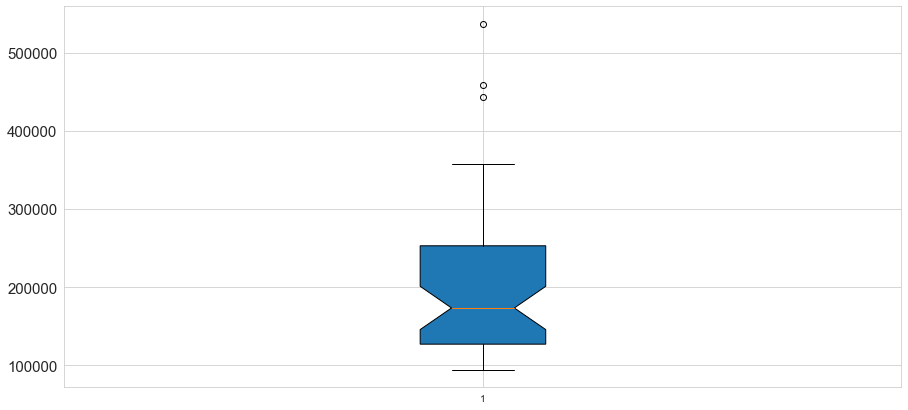

In [55]:
plt.figure(figsize=(15,7))
plt.boxplot(df_rev00['Home Value'],notch=True, patch_artist=True)
plt.yticks(fontsize=15)
plt.show()

Nhận xét: 
+ Sự dao động trên giá trị trung vị là tất lớn, lớn hơn dao động dưới tầm 50%
+ Có 3 giá trị mà được coi là outlier, 3 giá trị nào rời rạc và tách biệt với các nhóm còn lại (>400000$) <p>
==> Cho thấy sự phân hóa giá nhà giữa các bang là tương đối rõ ràng

In [56]:
# Các dữ liệu outlier đó là những bang nào?
df_rev00.loc[df_rev00['Home Value'] > 400000]

,State,Home Value,HH Inc,Per Cap Inc,Pct Owner Occ
5,California,458500,60883,29188,57.4
9,District of Columbia,443300,58526,42078,43.5
12,Hawaii,537400,66420,28882,59.3


+ Mức giá nhà ở 3 Bang này khá cao
+ Thu nhập hộ gia đình cũng nẳm ở mức cao
+ Thu nhập cá nhân cũng cao  <p>
--> Nhưng tỉ lệ mua nhà nằm ở nhóm tương đối cho thấy có những vấn đề khác ảnh hưởng đến tỉ lệ mua nhà như: <p>
+ Nhu cầu con người, họ chỉ muốn ở thuê, không muốn sở hữu 1 căn nhà quá đắt đỏ.
+ Thành phố của việc làm, công nghiệp,...


**2.2 HH Inc: Thu nhập gia đình**

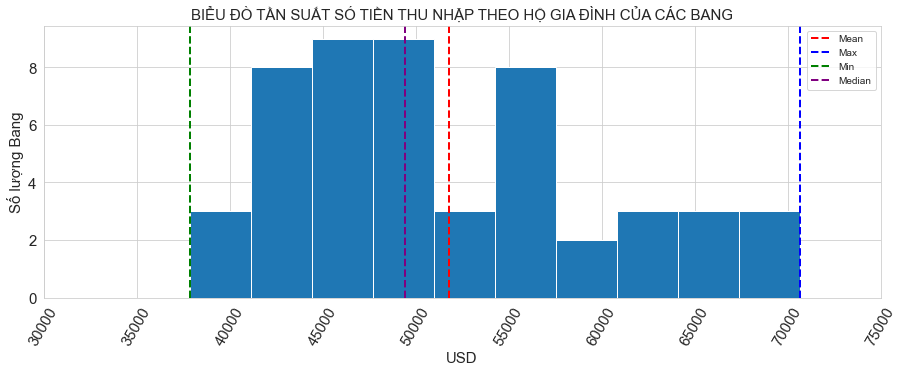

mean      51776.39
std        8357.42
min       37881.00
max       70647.00
median    49424.00
Name: HH Inc, dtype: float64

In [57]:
plt.figure(figsize=(15,5))

plt.hist(df_rev00['HH Inc'],bins=10)
plt.axvline(df_rev00['HH Inc'].mean(),color='red',linestyle='--',label='Mean',linewidth=2)
plt.axvline(df_rev00['HH Inc'].max(),color='blue',linestyle='--',label='Max',linewidth=2)
plt.axvline(df_rev00['HH Inc'].min(),color='green',linestyle='--',label='Min',linewidth=2)
# plt.axvline(df_rev00['HH Inc'].std(),color='yellow',linestyle='--',label='Standard Deviation',linewidth=5)
plt.axvline(df_rev00['HH Inc'].median(),color='Purple',linestyle='--',label='Median',linewidth=2)
plt.xticks(np.arange(30000,80000,5000),fontsize=15,rotation=60)
plt.yticks(fontsize=15)
plt.legend(prop={'size': 10})
plt.xlabel('USD',fontsize=15)
plt.ylabel('Số lượng Bang',fontsize=15)
plt.title('BIỂU ĐỒ TẦN SUẤT SỐ TIỀN THU NHẬP THEO HỘ GIA ĐÌNH CỦA CÁC BANG',fontsize=15)
plt.show();
statictis_table.iloc[1]

Nhận xét:
+ Phần lớn thu nhập trung bình theo hộ gia đình của các bang từ 40000$ đến 50000$
+ Tuy nhiên có 1 nhóm có số lượng khá lớn có mức lương 55000 đến gần 60000$
+ Các nhóm mức lương còn lại khá thấp từ 2 đền 3 bang.

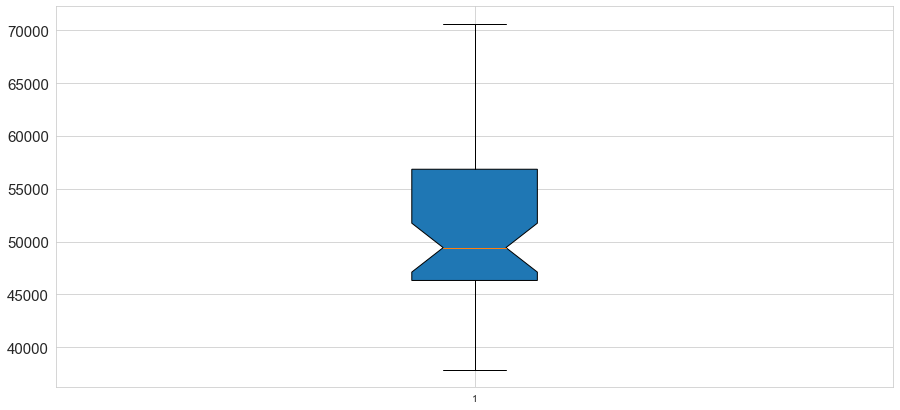

In [58]:
plt.figure(figsize=(15,7))
plt.boxplot(df_rev00['HH Inc'],notch=True, patch_artist=True)
plt.yticks(fontsize=15)
plt.show();

Nhận xét: Thu nhập cá nhân theo Bang
+ Sự dao độn trên quanh giá trị trung vị là rất lớn.
+ Sự dao độn dưới quanh giá trị trung vị là tương đối. <p>
==> Sự phân hóa mức thu nhập cá nhân giữa các bang tương đối rõ ràng và chênh lệch cũng khá lớn

2.3 Per Cap Inc: Thu nhập cá nhân trong 1 gia đình

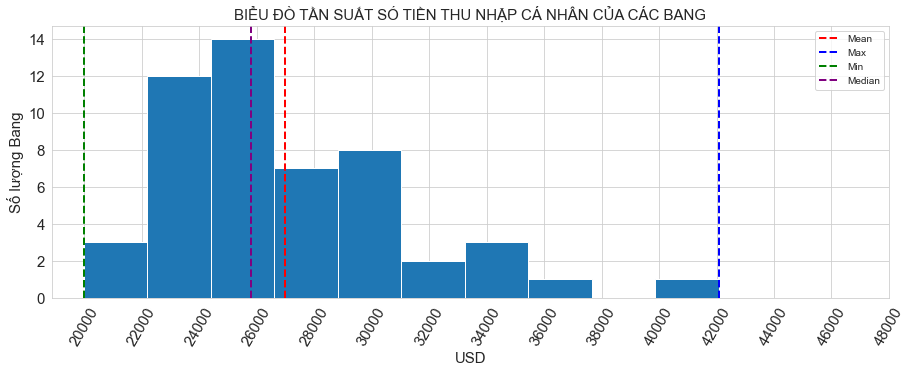

mean      26983.20
std        4329.31
min       19977.00
max       42078.00
median    25803.00
Name: Per Cap Inc, dtype: float64

In [59]:
plt.figure(figsize=(15,5))

# bins = np.arange(min(df_rev00['HH Inc'])*0.95,max(df_rev00['HH Inc'])*1.1,5000)

plt.hist(df_rev00['Per Cap Inc'])
plt.axvline(df_rev00['Per Cap Inc'].mean(),color='red',linestyle='--',label='Mean',linewidth=2)
plt.axvline(df_rev00['Per Cap Inc'].max(),color='blue',linestyle='--',label='Max',linewidth=2)
plt.axvline(df_rev00['Per Cap Inc'].min(),color='green',linestyle='--',label='Min',linewidth=2)
# plt.axvline(df_rev00['Per Cap Inc'].std(),color='yellow',linestyle='--',label='Standard Deviation',linewidth=5)
plt.axvline(df_rev00['Per Cap Inc'].median(),color='Purple',linestyle='--',label='Median',linewidth=2)
plt.xticks(np.arange(20000,50000,2000),fontsize=15,rotation=60)
plt.yticks(fontsize=15)
plt.xlabel('USD',fontsize=15)
plt.ylabel('Số lượng Bang',fontsize=15)
plt.title('BIỂU ĐỒ TẦN SUẤT SỐ TIỀN THU NHẬP CÁ NHÂN CỦA CÁC BANG',fontsize=15)
plt.legend(prop={'size': 10})
plt.show();
statictis_table.iloc[2]

Nhận xét: Chia theo 3 nhóm mức lương cá nhân (theo số lượng Bang):
+ Nhóm 1: 22000 đến 26000$ chiếm từ 12 đến 14 Bang
+ Nhóm 2 : 2600 đến 30000$ ttong khoảng 6 đến 7 Bang
+ Nhóm 3: Các khoảng mức lương khác, trung bình 2 đến 3 Bang.
+ Có 1 bang có thu nhập cá nhân khá cao.

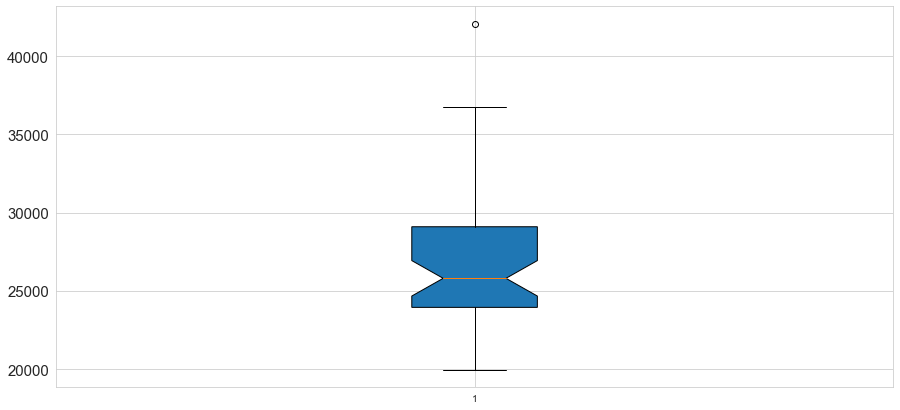

In [60]:
plt.figure(figsize=(15,7))
plt.boxplot(df_rev00['Per Cap Inc'],notch=True, patch_artist=True)
plt.yticks(fontsize=15)
plt.show();

Nhận xét: 
+ Nhóm trên mức trung vị dao động nhiều thể hiện sự phân hóa giữa các bang về thu nhập cá nhân
+ Các bang dưới mức trung vị có giá trị gần gần nhau và ít phân hóa <p>
+ Có 1 outlier được tìm thấy trong cột dữ liệu này (>40000$) <p>
=>> Nhóm mức lương trung bình phổ biến tập trung ở dưới mức trung vị, điều này cho ta thấy sự phân hóa giữa nhóm cao và nhóm thấp rất nhiều.

In [61]:
# Xuất dữ liệu outlier
df_rev00.loc[df_rev00['Per Cap Inc'] > 40000]

,State,Home Value,HH Inc,Per Cap Inc,Pct Owner Occ
9,District of Columbia,443300,58526,42078,43.5


2.4. Pct Owner Occ: Tỉ lệ sở hữu nhà

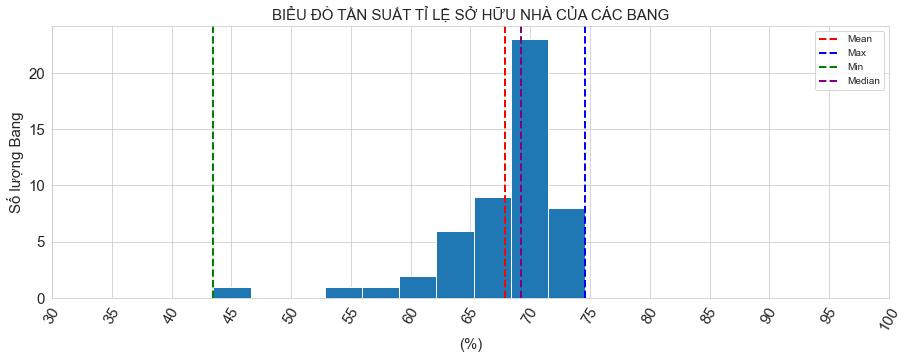

mean      67.87
std        5.38
min       43.50
max       74.60
median    69.20
Name: Pct Owner Occ, dtype: float64

In [62]:
plt.figure(figsize=(15,5))

plt.hist(df_rev00['Pct Owner Occ'])
plt.axvline(df_rev00['Pct Owner Occ'].mean(),color='red',linestyle='--',label='Mean',linewidth=2)
plt.axvline(df_rev00['Pct Owner Occ'].max(),color='blue',linestyle='--',label='Max',linewidth=2)
plt.axvline(df_rev00['Pct Owner Occ'].min(),color='green',linestyle='--',label='Min',linewidth=2)
# plt.axvline(df_rev00['Pct Owner Occ'].std(),color='yellow',linestyle='--',label='Standard Deviation',linewidth=5)
plt.axvline(df_rev00['Pct Owner Occ'].median(),color='Purple',linestyle='--',label='Median',linewidth=2)
plt.xticks(np.arange(30,105,5),fontsize=15,rotation=60)
plt.yticks(fontsize=15)
plt.legend(prop={'size': 10})
plt.xlabel('(%)',fontsize=15)
plt.ylabel('Số lượng Bang',fontsize=15)
plt.title('BIỂU ĐỒ TẦN SUẤT TỈ LỆ SỞ HỮU NHÀ CỦA CÁC BANG',fontsize=15)
plt.show();
statictis_table.iloc[3]

Nhận xét:
+ Phần lớn các bang có tỉ lệ sở hữu nhà vào khoảng xung quanh giá trị 70% (tương đối cao, cao hơn giá trị trung bình)
+ Các Bang còn lại ở mức 60 đến 75%
+ Có 1 bang rất thấp (45%) có thể là dữ liệu nhiễu hay thực tế khó khăn

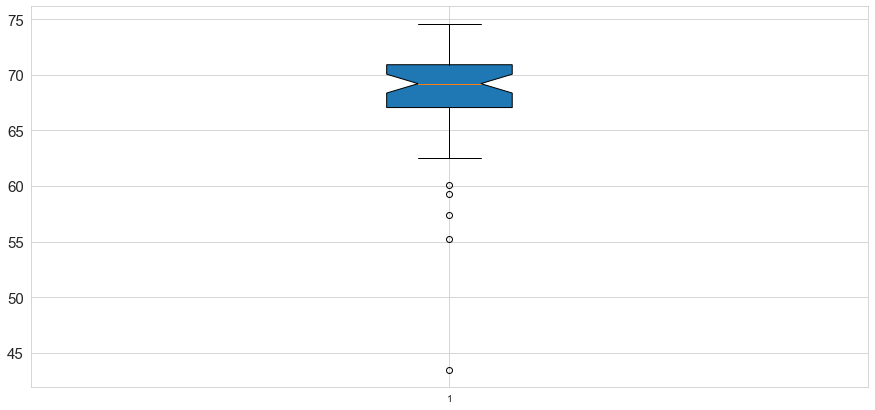

In [63]:
plt.figure(figsize=(15,7))
plt.boxplot(df_rev00['Pct Owner Occ'],notch=True, patch_artist=True)
plt.yticks(fontsize=15)
plt.show();

Nhận xét:
+ dao động trên và dao độngd dưới là như nhau cho thấy các bang có tỉ lệ mua nhà gần như là chênh lệch không nhiều
+ Dữ liệu có tồn tại những bản ghi outlier(thấp hơn Q1) <p>

In [64]:
# Xuất các giá trị outlier
df_rev00.loc[df_rev00['Pct Owner Occ'] < 62]

,State,Home Value,HH Inc,Per Cap Inc,Pct Owner Occ
5,California,458500,60883,29188,57.4
9,District of Columbia,443300,58526,42078,43.5
12,Hawaii,537400,66420,28882,59.3
29,Nevada,254200,55726,27589,60.1
33,New York,303900,55603,30948,55.2


Theo em thì những outlier ở trên là tương đối bình thường vì nhìn qua giá trị ở các cột khác, giá tiền nhà là thu nhập khá là chênh lệch nên tỉ lệ sở hữu 1 căn nhà là không cao.

### 3. TÌM HIỂU MỐI QUAN HỆ GIỮA CÁC BIẾN

3.1 Home Value 

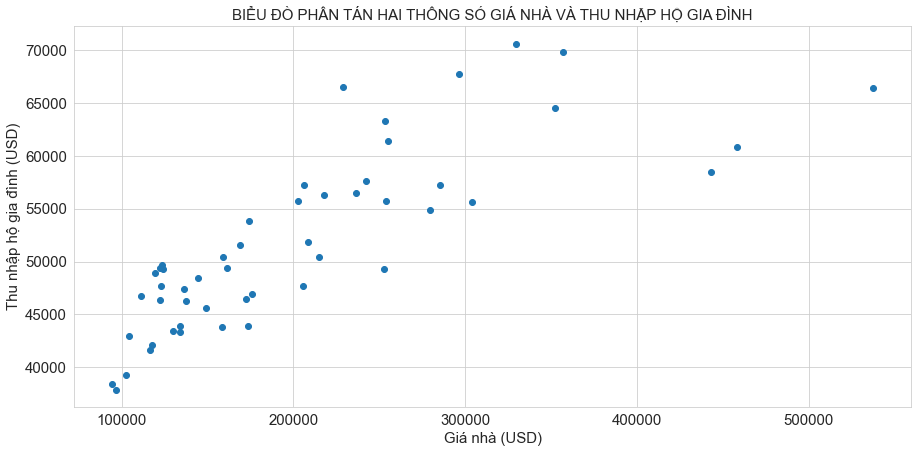

In [69]:
plt.figure(figsize=(15,7))
plt.scatter(df_rev00['Home Value'],df_rev00['HH Inc'])
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Giá nhà (USD)',fontsize=15)
plt.ylabel('Thu nhập hộ gia đình (USD)',fontsize=15)
plt.title('BIỂU ĐỒ PHÂN TÁN HAI THÔNG SỐ GIÁ NHÀ VÀ THU NHẬP HỘ GIA ĐÌNH CÁC BANG TẠI MỸ',fontsize=15)
plt.show()

Mối quan hệ giữa giá nhà và thu nhập theo hộ gia đình:
+ Biểu đồ trên cho thấy một xu hướng khá rõ ràng là khi thu nhập theo hộ gia đình tăng lên thì giá nhà cũng tăng (sự tương quan thuận khá rõ ràng, dễ nhận dạng) <p>
+ Có 3 điểm dữ liệu dường như tách biệt với các điểm dữ liệu còn lại (tuy giá tiền nhà là cao nhất nhưng mức thu nhập hộ gia đình thì không cao), tuy nhiên nó vẫn nằm trong xu hướng chung nhất định. <p>
**--> Cho thấy khi mức lương theo hộ gia đình tăng lên --> ảnh hưởng đến xu hướng mua nhà tăng --> các chủ nhà muôn thu lại lợi nhuận lớn nên sẽ đẩy giá nha cao hơn (thuận với mức lương theo mặt bằng chung của Bang đó)**

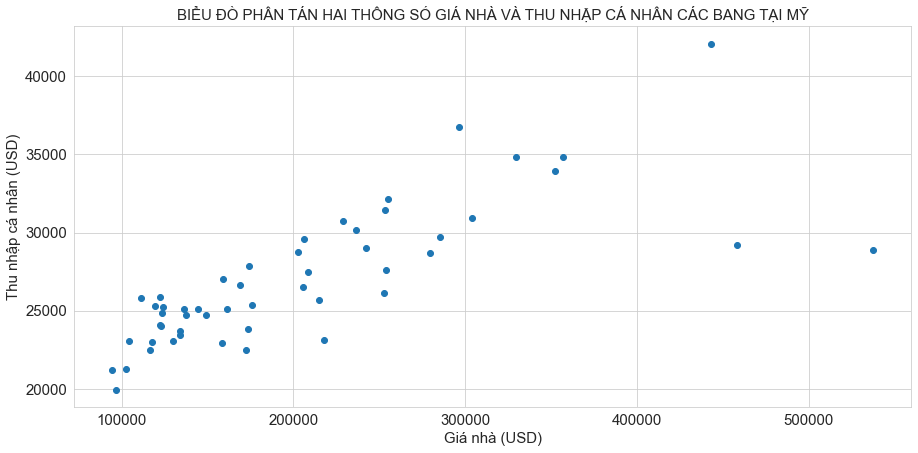

In [70]:
plt.figure(figsize=(15,7))
plt.scatter(df_rev00['Home Value'],df_rev00['Per Cap Inc'])
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Giá nhà (USD)',fontsize=15)
plt.ylabel('Thu nhập cá nhân (USD)',fontsize=15)
plt.title('BIỂU ĐỒ PHÂN TÁN HAI THÔNG SỐ GIÁ NHÀ VÀ THU NHẬP CÁ NHÂN CÁC BANG TẠI MỸ',fontsize=15)
plt.plot()
plt.show()

Mối quan hệ giữa giá nhà và thu nhập trung bình:
+ Thể hiện xu hướng khi thu nhập cá nhân tăng thì giá nhà tăng (tương quan thuận khá rõ ràng, dễ nhận dạng)
+ Có 2 điểm dữ liệu nằm rời rạc, không cho thấy có xu hướng chung như các điểm dữ liệu còn lại. <p>
**==> Thu nhập cá nhân tăng dẫn đến gia nhà tăng, lí do cũng tương tự câu kết luận ở trên, chủ nhà muốn thu lại nhiều lợi nhuận nhất trogn xã hội phát triển mà mỗi con người đều có mức thu nhập cá nhân cao.**

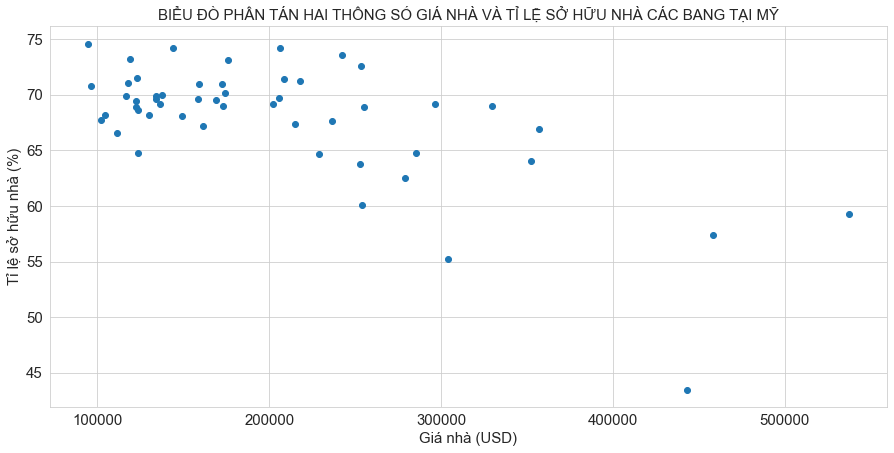

In [72]:
plt.figure(figsize=(15,7))
plt.scatter(df_rev00['Home Value'],df_rev00['Pct Owner Occ'])
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Giá nhà (USD)',fontsize=15)
plt.ylabel('Tỉ lệ sở hữu nhà (%)',fontsize=15)
plt.title('BIỂU ĐỒ PHÂN TÁN HAI THÔNG SỐ GIÁ NHÀ VÀ TỈ LỆ SỞ HỮU NHÀ CÁC BANG TẠI MỸ',fontsize=15)
plt.plot()
plt.show()

Mối quan hệ giữa giá nhà và tỉ lệ sở hữu nhà:
+ Mối quan hệ này thể hiện sự tương quan thuận khi giá nhà càng cao thì tỉ lệ sở hữu nhà càng thấp và ngược lại. Tuy nhiên sự tương quan thuận này không thể hiện 1 cách mạnh mẽ: <p>
-- ta chia thành 2 nhóm: 
  * Nhóm 1 (giá nhà 0-20000$): thể hiện sự tương quan tương quan yếu (không thể hiện rõ xu hướng chung)
  * Nhóm 2 (200000-300000$): Thể hiện sự tương quan thuận mạnh, ta dễ dàng nhận ra xu hướng tương quan này.
  * Nhóm 3 (>300000$): Thể hiện sự ngậu nhiên khi các điểm dữ liệu không thể hiện 1 xu hướng nào cả. <p>
__==> Với nhóm 1, tạm gọi là nhóm giá mà người dân có thể tiếp cận dễ dàng hơn (số đông) thì tỉ lệ sở hựu nhà là tương đối đồng đều nhau (không chênh lệch nhiều). Nhóm 2 có tỉ lệ mua nhà phân hóa rõ rệt khi giá nhà tăng lên, nhóm giá nhà mà người dân cân nhắc kĩ trước khi mua nhà (khó tiếp cận - số lượng ít). Nhóm 3 là nhóm thể hiện sữ ngẫu nhiên, nhóm giá nhà rất cao, những người sở hữu là những doanh nhân lớn, họ có đủ tài chính để tạo nên sự ngẫu nhiên đó.__

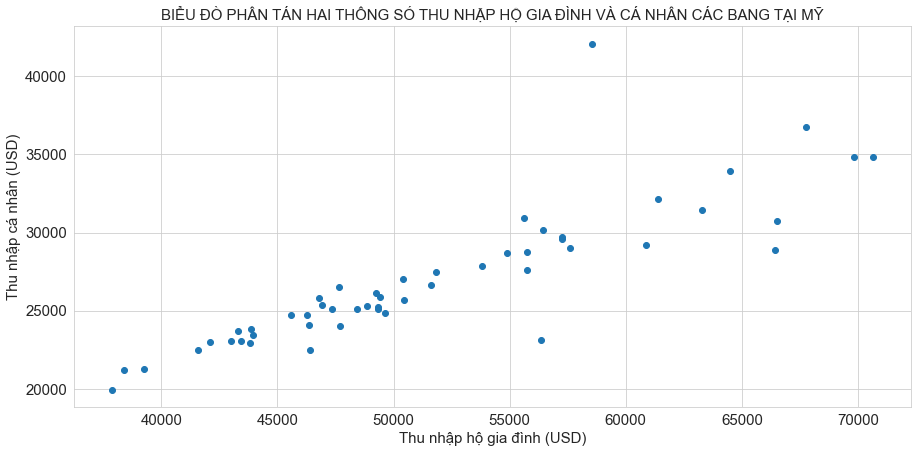

In [73]:
plt.figure(figsize=(15,7))
plt.scatter(df_rev00['HH Inc'],df_rev00['Per Cap Inc'])
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Thu nhập hộ gia đình (USD)',fontsize=15)
plt.ylabel('Thu nhập cá nhân (USD)',fontsize=15)
plt.title('BIỂU ĐỒ PHÂN TÁN HAI THÔNG SỐ THU NHẬP HỘ GIA ĐÌNH VÀ CÁ NHÂN CÁC BANG TẠI MỸ',fontsize=15)
plt.plot()
plt.show()

Mối quan hệ giữa thu nhập hộ gia đình và cá nhân: <p>
+ Hai thông số này rất dễ hiệu, thành viên trong gia đình có thu nhập cao thể hiện qua sự tương quan thuận khá rõ rệt (tương quan mạnh)<p>
    __=> Gia đình có mức thu nhập cao.__
+ Tuy nhiên có 1 điểm dữ liệu rời rạc, nằm ngoài xu hướng chung, thu nhập cá nhân rất cao nhưng thu nhập theo hộ gia đinh chỉ nằm trên mức trung vị 1 chút. <p>
    __=> Bang này có vấn đề, có thể do lỗi trong quá trình trích xuất dữ liệu hay tệ hơn là việc khai báo thu nhập không chính xác.__

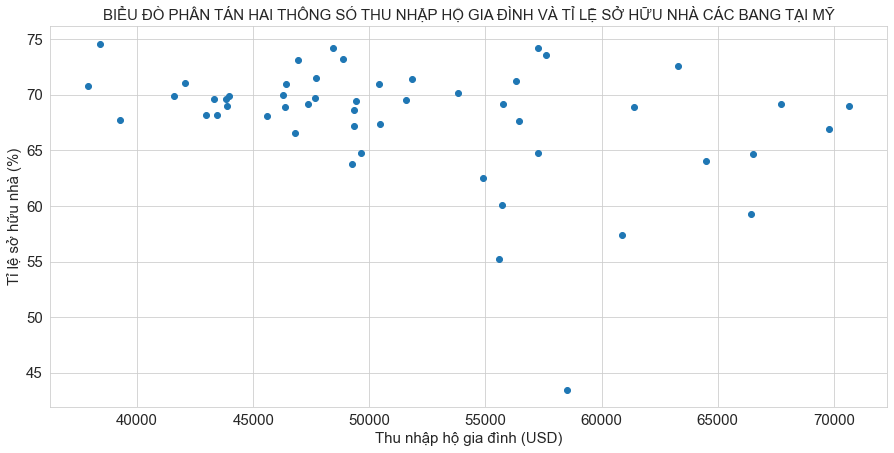

In [74]:
plt.figure(figsize=(15,7))
plt.scatter(df_rev00['HH Inc'],df_rev00['Pct Owner Occ'])
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Thu nhập hộ gia đình (USD)',fontsize=15)
plt.ylabel('Tỉ lệ sở hữu nhà (%)',fontsize=15)
plt.title('BIỂU ĐỒ PHÂN TÁN HAI THÔNG SỐ THU NHẬP HỘ GIA ĐÌNH VÀ TỈ LỆ SỞ HỮU NHÀ CÁC BANG TẠI MỸ',fontsize=15)
plt.plot()
plt.show()

Mối quan hệ giữa thu nhập gia đình và tỉ lệ sở hữu nhà:
+ Sự tương quan này thể hiện không rõ ràng, ta có thể chia làm các nhóm sau:
    + Nhóm 1 (0-55000$): tỉ lệ sở hữu hộ gia đình ở nhóm này tương đối ngẫu nhiên, không thể hiện 1 xu hướng nào rõ ràng, tỉ lệ mua nhà tương đối cao. <p>
        __==> Việc sở hữu 1 căn nhà ở nhóm thu nhập này là điều bắt buộc, có thể do họ muốn có một cuộc sống đảm bảo về chỗ ở.__
    + Nhóm 2 (còn lại): các điểm dữ liệu phân bố ngẫu nhiên không thể hiện một xu hướng nào. <p>
        __==> Hành vi mua nhà của nhóm gia đình có thu nhập cao không rõ ràng, tỉ lệ sở hữu nhà của nhóm này phân bố rộng từ thấp đến cao, tuy nhiên họ cũng có nhu cầu đảm bảo chỗ ở.__

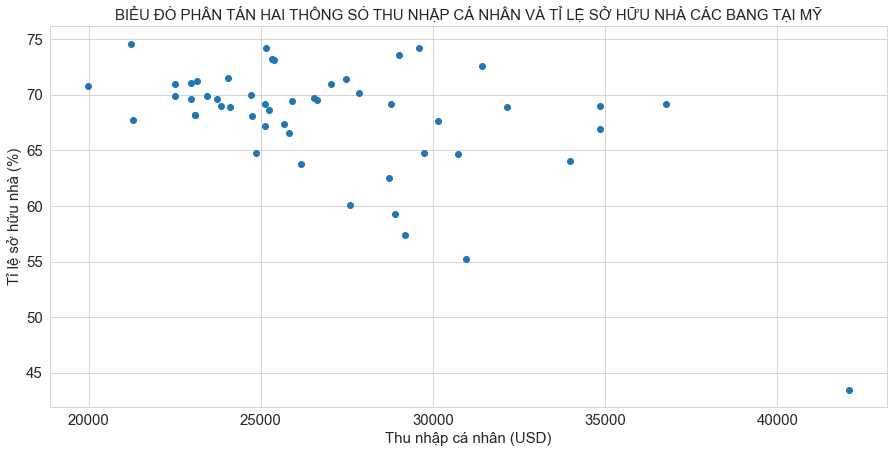

In [75]:
plt.figure(figsize=(15,7))
plt.scatter(df_rev00['Per Cap Inc'],df_rev00['Pct Owner Occ'])
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Thu nhập cá nhân (USD)',fontsize=15)
plt.ylabel('Tỉ lệ sở hữu nhà (%)',fontsize=15)
plt.title('BIỂU ĐỒ PHÂN TÁN HAI THÔNG SỐ THU NHẬP CÁ NHÂN VÀ TỈ LỆ SỞ HỮU NHÀ CÁC BANG TẠI MỸ',fontsize=15)
plt.plot()
plt.show()

Mối quan hệ giữa thu nhập cá nhân và tỉ lệ sở hữu nhà:
+ Nhóm Bang có thu nhập cá nhân từ 20000 đến 25000$ tỉ lệ sở hữu nhà khá lớn dù mức thu nhập của họ không cao __==> Nhu cầu đảm bảo chỗ ở lớn.__
+ Nhóm Bang có thu nhập cá nhân từ 25000 đến 30000$ phân bố từ thấp đến cao, đa số là cao nhưng có 1 vài Bang tỉ lệ sở hữu nhà khá thấp. Có thể là do nhu cầu chổ ở của họ ko cần thiết phải mua thẳng 1 chỗ ở cố định, họ là người đi công tác,... __==> Đặc biệt so với tât cả, phụ thuộc vào nhu cầu của mỗi cá nhân.__
+ Nhóm > 30000$ tỉ lệ sở hữu nhà cao hơn nhóm trên nhưng vẫn thấp cho với nhóm 1, mật độ điễm dữ liệu thưa thớt. __==> Người có thu nhập cao có xu hướng ổn định chổ ỡ.__

### Phân tích tương quan của các yếu tố ảnh hưởng đến già nhà

In [84]:
corr = df_rev00.corr()
corr

,Home Value,HH Inc,Per Cap Inc,Pct Owner Occ
0,,,,
Home Value,1.000000,0.803462,0.766173,-0.659473
HH Inc,0.803462,1.000000,0.858159,-0.339409
Per Cap Inc,0.766173,0.858159,1.000000,-0.531749
Pct Owner Occ,-0.659473,-0.339409,-0.531749,1.000000


In [100]:
# plt.figure(figsize=(10,10))
# plt.heat(df_rev00.corr())
# plt.show();

# Sử dụng bảng biểu nhiệt độ màu để thể hiện mức độ tương quan
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\VINH\AppData\Local\Temp\ipykernel_11652\3147257856.py:6: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


0,Home Value,HH Inc,Per Cap Inc,Pct Owner Occ
0,,,,
Home Value,1.00,0.80,0.77,-0.66
HH Inc,0.80,1.00,0.86,-0.34
Per Cap Inc,0.77,0.86,1.00,-0.53
Pct Owner Occ,-0.66,-0.34,-0.53,1.00


Ta chỉ quan tâm đến dòng đâu tiên - Home Value và nhìn sang các giá trị (theo màu) đối với các yếu tố:
+ HH Inc
+ Per Cap Inc
+ Pct Owner Occ

Kiểm tra lại đồ thị

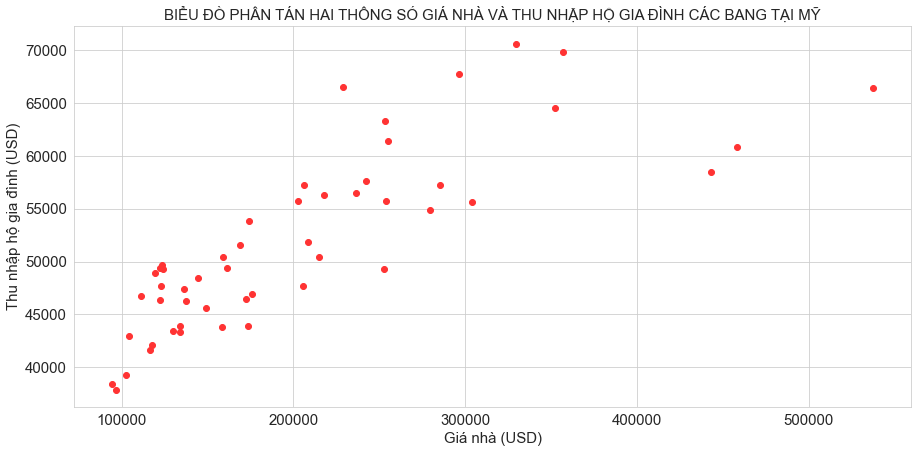

In [94]:
plt.figure(figsize=(15,7))
plt.scatter(df_rev00['Home Value'],df_rev00['HH Inc'],c='#ff3333')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Giá nhà (USD)',fontsize=15)
plt.ylabel('Thu nhập hộ gia đình (USD)',fontsize=15)
plt.title('BIỂU ĐỒ PHÂN TÁN HAI THÔNG SỐ GIÁ NHÀ VÀ THU NHẬP HỘ GIA ĐÌNH CÁC BANG TẠI MỸ',fontsize=15)
plt.show()

Quan sát biểu đồ trên, ta thấy rằng các điểm dữ liệu phân bố theo một xu hướng nhất định được thể hiện rất rõ ràng (có 1 điểm dự liệu nằm ngoài xu hướng đó). Khi thu nhập gia đình tăng thì giá nhà cũng tăng và ngược lại được gọi là sự tương quan thuận. Hệ số tương quan giữa 2 yếu tố = 0.8 ==> Thể hiện sự tương quan thuận ở mức độ mạnh <p> **=> Giá nhà tác động một cách tích cực đến sự biến đổi (dao động) giá nhà ở các Bang tại Mỹ.** 

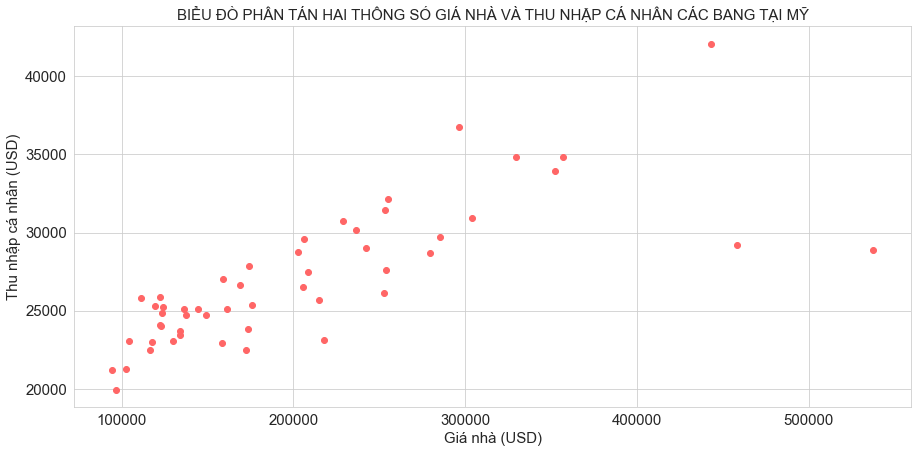

In [95]:
plt.figure(figsize=(15,7))
plt.scatter(df_rev00['Home Value'],df_rev00['Per Cap Inc'],color='#ff6666')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Giá nhà (USD)',fontsize=15)
plt.ylabel('Thu nhập cá nhân (USD)',fontsize=15)
plt.title('BIỂU ĐỒ PHÂN TÁN HAI THÔNG SỐ GIÁ NHÀ VÀ THU NHẬP CÁ NHÂN CÁC BANG TẠI MỸ',fontsize=15)
plt.plot()
plt.show()

Các điểm dữ liệu phân bố theo một xu hướng nhất định